In [1]:
#installing packages
!pip install statsmodels
import numpy as np
import pandas as pd

# Visualization
!pip install missingno
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

/Users/anupamakadambi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/anupamakadambi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
#Load the dataset
df=pd.read_csv('diabetic_data.csv')

In [3]:
#Check the dimensions of dataset
df.shape

(101766, 50)

In [4]:
#Display the raw data to understand the data better
df.head(100)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1195056,79549353,Caucasian,Male,[70-80),?,2,1,2,1,...,No,Steady,No,No,No,No,No,No,Yes,>30
96,1195548,106343838,Caucasian,Female,[70-80),?,1,3,7,5,...,No,Steady,No,No,No,No,No,No,Yes,>30
97,1212006,84981816,Caucasian,Male,[70-80),?,1,1,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,NO
98,1257282,84488562,Other,Female,[50-60),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:
#Check data types
print(df.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

## Encounter ID is a unique identifier. So the datatype should ideally be object type.
Operating on object-typed dataframes/arrays is slow because Pandas needs to operate on each item using the inefficient CPython interpreter. This causes a high overhead due to reference counting, internal pointer indirections, type checks, internal function calls, etc. Pandas often uses Numpy internally which can be much faster when the types are native like int64, int32, float64, etc. In that case, Numpy can execute a optimized native code that is not slowed down by the CPython overheads and that can even benefit from hardware SIMD units (regarding the target function used). While Numpy supports bounded strings, Pandas does not use this but slow CPython string objects instead. Strings are inherently slow, even in native codes, because of their generally variable size that is often predictable (this strongly impacts the processor that need to predict branches so to be fast, see this post about branch prediction). In practice, unicode characters make strings even slower (it makes the use of SIMD instructions very difficult and branch even harder to predict). Categorial are basically integers associated with a mapping table (of unique values). Categorial columns can theoretically be faster for some computation because the table is already computed. However, the initial computation of the table can be expensive. Additionally, the table is not always used efficient where it could resulting sometimes to a surprisingly slower execution compared to integers. Not to mentions the table can be big when all the values are different. Integers are the less expensive type. Smaller integer can often be faster. Indeed, SIMD vectors have a fixed size (eg. the AVX-2 SIMD instruction set of 86-64 processors can compute 32 int8 value in a row compared to only 4 int64). Furthermore, smaller items cause the whole columns to take less memory reducing the memory throughput so it improve the performance of memory-bound codes (starting from dataframe copies that are pretty frequent in Pandas). However, this is not always faster because smaller types can sometime cause type-conversion adding an additional overhead (though this overhead can be mitigated using lower-level optimizations)

So we leave enounter ID and patient number to be int64

In [6]:
""" 
Target content changed to 1-0

The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.

The variable actually has <30, >30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

NO and >30: 0

<30 : 1

""" 

df['readmitted']=np.where(df['readmitted']=='<30',1,0)

# Now, convert the 'readmitted' column to categorical
df['readmitted'] = df['readmitted'].astype('category')

print(df['readmitted'])

0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 101766, dtype: category
Categories (2, int64): [0, 1]


/Users/anupamakadambi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


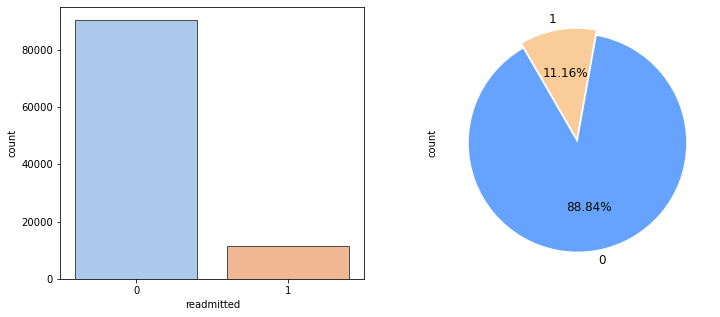

In [7]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=df.readmitted, data=df, palette="pastel",ax=ax[0], edgecolor=".3")
df.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [8]:
# Drop the weight column because it has NaN values and it is of no use to our modeling.
df.drop(columns=['weight'],inplace=True)

In [9]:
#check the dataframe after dropping 'weight' column
print(df.head(100))

# Check dimension of dataframe after dropping 'weight' column
print("dimensions of data frame are: ", df.shape)

    encounter_id  patient_nbr             race  gender      age  \
0        2278392      8222157        Caucasian  Female   [0-10)   
1         149190     55629189        Caucasian  Female  [10-20)   
2          64410     86047875  AfricanAmerican  Female  [20-30)   
3         500364     82442376        Caucasian    Male  [30-40)   
4          16680     42519267        Caucasian    Male  [40-50)   
..           ...          ...              ...     ...      ...   
95       1195056     79549353        Caucasian    Male  [70-80)   
96       1195548    106343838        Caucasian  Female  [70-80)   
97       1212006     84981816        Caucasian    Male  [70-80)   
98       1257282     84488562            Other  Female  [50-60)   
99       1260216     92117574                ?    Male  [30-40)   

    admission_type_id  discharge_disposition_id  admission_source_id  \
0                   6                        25                    1   
1                   1                         1    

In [10]:
#Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      101766 non-null  object  
 3   gender                    101766 non-null  object  
 4   age                       101766 non-null  object  
 5   admission_type_id         101766 non-null  int64   
 6   discharge_disposition_id  101766 non-null  int64   
 7   admission_source_id       101766 non-null  int64   
 8   time_in_hospital          101766 non-null  int64   
 9   payer_code                101766 non-null  object  
 10  medical_specialty         101766 non-null  object  
 11  num_lab_procedures        101766 non-null  int64   
 12  num_procedures            101766 non-null  int64   
 13  num_medications           101

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [12]:
#check for duplicate values df.duplicated()
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Length: 101766, dtype: bool

In [13]:
#Check for missing values 
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

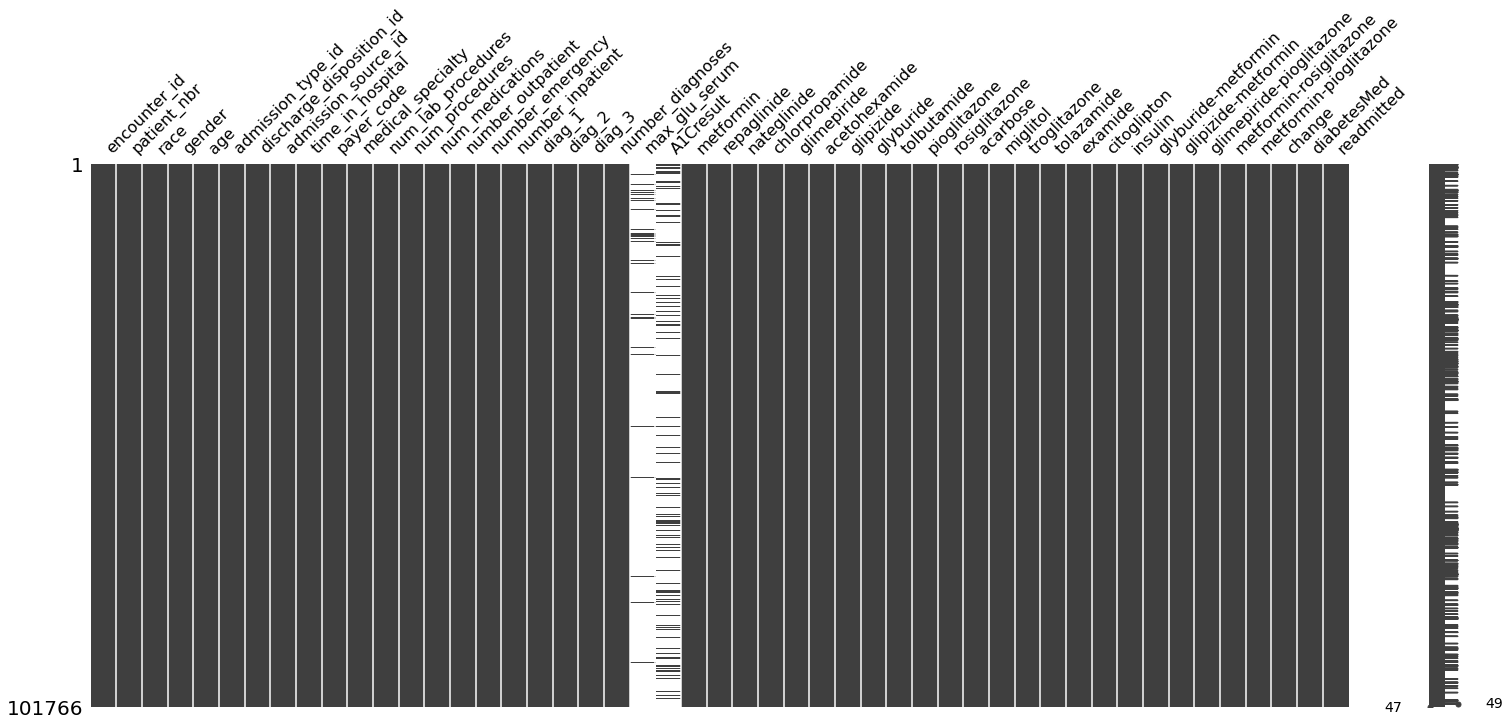

In [14]:
#Visulaize the missing values
msno.matrix(df)
plt.show()

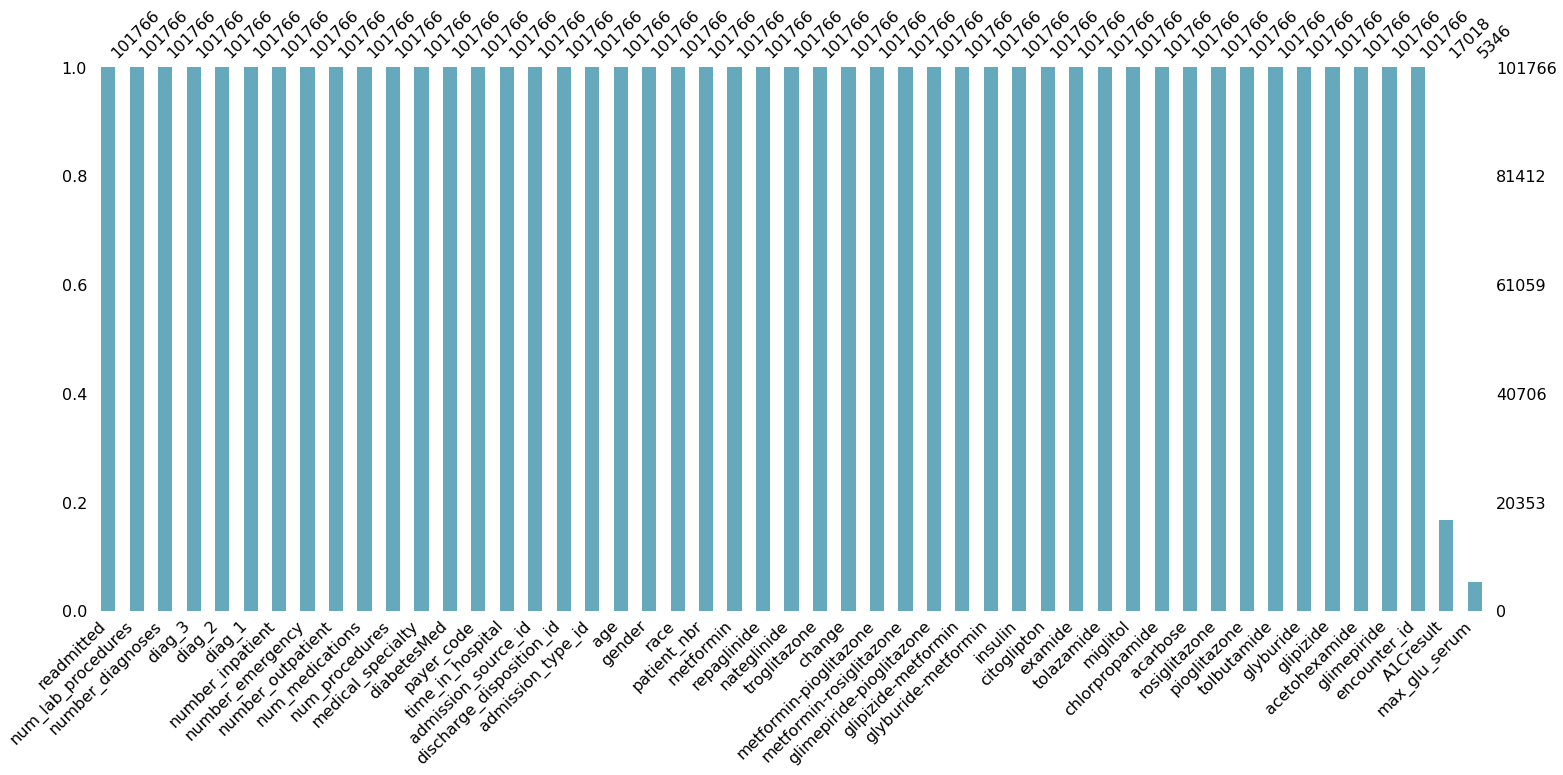

In [15]:
msno.bar(df,sort='descending',color='#66a9bc')
plt.show()

In [16]:
def Missing_Values(data):
    variable_name = []
    data_type = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [17]:
data=Missing_Values(df)
data

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
max_glu_serum,101766,96420,0.9475,object,"[nan, >300, Norm, >200]",4
A1Cresult,101766,84748,0.8328,object,"[nan, >7, >8, Norm]",4
encounter_id,101766,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101766
troglitazone,101766,0,0.0000,object,"[No, Steady]",2
acetohexamide,101766,0,0.0000,object,"[No, Steady]",2
glipizide,101766,0,0.0000,object,"[No, Steady, Up, Down]",4
glyburide,101766,0,0.0000,object,"[No, Steady, Up, Down]",4
tolbutamide,101766,0,0.0000,object,"[No, Steady]",2
pioglitazone,101766,0,0.0000,object,"[No, Steady, Up, Down]",4


In [18]:
#max_glu serum and A1cresult have more than 80% of missing values. 
#It is going to be assumed that they dont provide enough value to our analysis. 
#they will be dropped. 
df.drop(columns=['max_glu_serum','A1Cresult'],inplace=True)

In [19]:
print(df.shape)

(101766, 47)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      101766 non-null  object  
 3   gender                    101766 non-null  object  
 4   age                       101766 non-null  object  
 5   admission_type_id         101766 non-null  int64   
 6   discharge_disposition_id  101766 non-null  int64   
 7   admission_source_id       101766 non-null  int64   
 8   time_in_hospital          101766 non-null  int64   
 9   payer_code                101766 non-null  object  
 10  medical_specialty         101766 non-null  object  
 11  num_lab_procedures        101766 non-null  int64   
 12  num_procedures            101766 non-null  int64   
 13  num_medications           101

In [21]:
#Display all 47 columns and go through data before normalization/re-scaling
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].head(10).to_list())  # Displaying as a list for clarity
    print("\n") 

Column: encounter_id
[2278392, 149190, 64410, 500364, 16680, 35754, 55842, 63768, 12522, 15738]


Column: patient_nbr
[8222157, 55629189, 86047875, 82442376, 42519267, 82637451, 84259809, 114882984, 48330783, 63555939]


Column: race
['Caucasian', 'Caucasian', 'AfricanAmerican', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian']


Column: gender
['Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female']


Column: age
['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']


Column: admission_type_id
[6, 1, 1, 1, 1, 2, 3, 1, 2, 3]


Column: discharge_disposition_id
[25, 1, 1, 1, 1, 1, 1, 1, 1, 3]


Column: admission_source_id
[1, 7, 7, 7, 7, 2, 2, 7, 4, 4]


Column: time_in_hospital
[1, 3, 2, 2, 1, 3, 4, 5, 13, 12]


Column: payer_code
['?', '?', '?', '?', '?', '?', '?', '?', '?', '?']


Column: medical_specialty
['Pediatrics-Endocrinology', '?', '?', '?', '?', 

In [22]:
#segregate numerical and obj columns from the df
numeric_df = df.select_dtypes(include=['int64'])
print(numeric_df)



        encounter_id  patient_nbr  admission_type_id  \
0            2278392      8222157                  6   
1             149190     55629189                  1   
2              64410     86047875                  1   
3             500364     82442376                  1   
4              16680     42519267                  1   
...              ...          ...                ...   
101761     443847548    100162476                  1   
101762     443847782     74694222                  1   
101763     443854148     41088789                  1   
101764     443857166     31693671                  2   
101765     443867222    175429310                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             25                    1                 1   
1                              1                    7                 3   
2                              1                    7                 2   
3                          

In [23]:
#Convert all columns which are of object datatype to categorical
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

In [24]:
print(df.dtypes)

encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
admission_type_id              int64
discharge_disposition_id       int64
admission_source_id            int64
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
g

In [25]:
df['encounter_id'] = df['encounter_id'].astype('category')
df['patient_nbr'] = df['patient_nbr'].astype('category')
df['admission_type_id'] = df['admission_type_id'].astype('category')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')
df['admission_source_id'] = df['admission_source_id'].astype('category')


In [26]:
print(df.dtypes)

encounter_id                category
patient_nbr                 category
race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
g

In [27]:
categ_df = df.select_dtypes(include=['category'])
categ_df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,?,?,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,MC,?,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [28]:
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
#Checking multicollinearity for numerica columns: compute VIF
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(vif_data)

                     feature        VIF
0               encounter_id  -0.008000
1                patient_nbr  -0.077550
2          admission_type_id   2.849948
3   discharge_disposition_id   1.581313
4        admission_source_id   3.092352
5           time_in_hospital   4.466677
6         num_lab_procedures   6.083589
7             num_procedures   1.985235
8            num_medications   7.684954
9          number_outpatient   1.123133
10          number_emergency   1.141164
11          number_inpatient   1.386586
12          number_diagnoses  12.926537


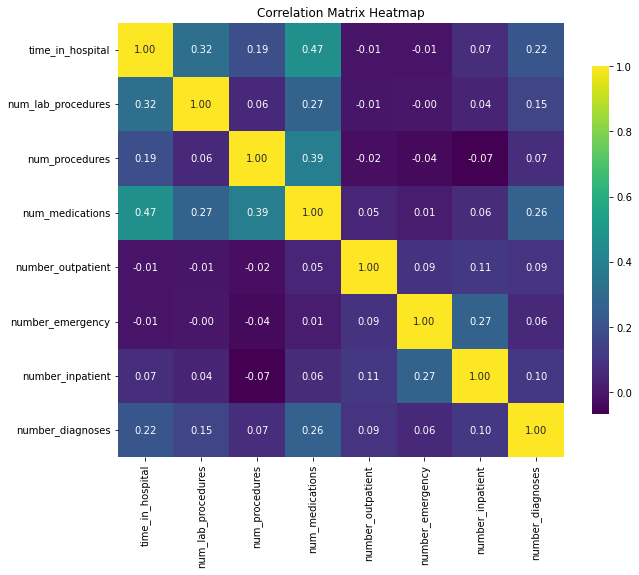

In [30]:
numeric_df = df.select_dtypes(include=['int64'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

              feature  importance
1  num_lab_procedures    0.368101
3     num_medications    0.241823
0    time_in_hospital    0.116647
2      num_procedures    0.078224
7    number_diagnoses    0.068776
6    number_inpatient    0.058141
4   number_outpatient    0.042320
5    number_emergency    0.025968


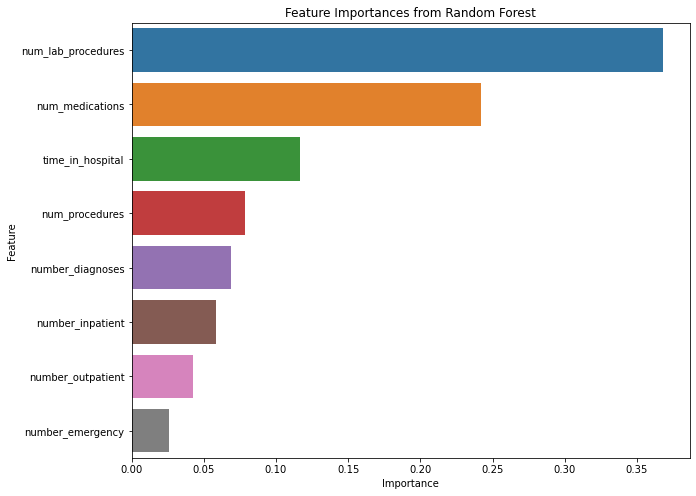

In [31]:
#feature selection for numerical data 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'numeric_df' is your DataFrame with numeric features
# and 'target' is the Series with the target variable
X = numeric_df  # Feature set
y = categ_df['readmitted']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame to see which features have the most importance
feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Display the feature importances
print(feature_importance_df)

# Plotting the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [32]:
numeric_df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1,41,0,1,0,0,0,1
1,3,59,0,18,0,0,0,9
2,2,11,5,13,2,0,1,6
3,2,44,1,16,0,0,0,7
4,1,51,0,8,0,0,0,5
...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9
101762,5,33,3,18,0,0,1,9
101763,1,53,0,9,1,0,0,13
101764,10,45,2,21,0,0,1,9


In [33]:
numeric_df= numeric_df.drop(columns=['number_emergency','number_outpatient'])

In [34]:
numeric_df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses
0,1,41,0,1,0,1
1,3,59,0,18,0,9
2,2,11,5,13,1,6
3,2,44,1,16,0,7
4,1,51,0,8,0,5
...,...,...,...,...,...,...
101761,3,51,0,16,0,9
101762,5,33,3,18,1,9
101763,1,53,0,9,0,13
101764,10,45,2,21,1,9


###### from scipy.stats import chi2_contingency
variables = categ_df.columns
p_values = pd.DataFrame(index=variables, columns=variables)

# Perform random forest 



In [35]:
categ_df=categ_df.drop(columns=[
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'examide',
'citoglipton',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone'])


In [36]:
categ_df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,diag_2,diag_3,metformin,repaglinide,glipizide,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,?,Pediatrics-Endocrinology,250.83,?,?,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,?,?,276,250.01,255,No,No,No,Up,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,?,?,648,250,V27,No,No,Steady,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,?,?,8,250.43,403,No,No,No,Up,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,?,?,197,157,250,No,No,Steady,Steady,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,MC,?,250.13,291,458,Steady,No,No,Down,Ch,Yes,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,MC,?,560,276,787,No,No,No,Steady,No,Yes,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,MC,?,38,590,296,Steady,No,No,Down,Ch,Yes,0
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,MC,Surgery-General,996,285,998,No,No,Steady,Up,Ch,Yes,0


In [37]:
#create new df with the most importnant features from numeric_df and categ_df
combined_df = pd.concat([numeric_df, categ_df], axis=1)
combined_df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,encounter_id,patient_nbr,race,gender,...,diag_1,diag_2,diag_3,metformin,repaglinide,glipizide,insulin,change,diabetesMed,readmitted
0,1,41,0,1,0,1,2278392,8222157,Caucasian,Female,...,250.83,?,?,No,No,No,No,No,No,0
1,3,59,0,18,0,9,149190,55629189,Caucasian,Female,...,276,250.01,255,No,No,No,Up,Ch,Yes,0
2,2,11,5,13,1,6,64410,86047875,AfricanAmerican,Female,...,648,250,V27,No,No,Steady,No,No,Yes,0
3,2,44,1,16,0,7,500364,82442376,Caucasian,Male,...,8,250.43,403,No,No,No,Up,Ch,Yes,0
4,1,51,0,8,0,5,16680,42519267,Caucasian,Male,...,197,157,250,No,No,Steady,Steady,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,9,443847548,100162476,AfricanAmerican,Male,...,250.13,291,458,Steady,No,No,Down,Ch,Yes,0
101762,5,33,3,18,1,9,443847782,74694222,AfricanAmerican,Female,...,560,276,787,No,No,No,Steady,No,Yes,0
101763,1,53,0,9,0,13,443854148,41088789,Caucasian,Male,...,38,590,296,Steady,No,No,Down,Ch,Yes,0
101764,10,45,2,21,1,9,443857166,31693671,Caucasian,Female,...,996,285,998,No,No,Steady,Up,Ch,Yes,0


In [42]:
combined_df = combined_df.replace('?', np.nan).dropna()


In [43]:
combined_df.shape

(26755, 26)

In [44]:
combined_df


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,encounter_id,patient_nbr,race,gender,...,diag_1,diag_2,diag_3,metformin,repaglinide,glipizide,insulin,change,diabetesMed,readmitted
20446,7,58,2,15,0,9,72091308,20123568,Caucasian,Female,...,821,276,285,No,No,No,Steady,Ch,Yes,0
20737,3,59,3,11,0,6,72848634,20377854,Caucasian,Female,...,V56,403,599,No,No,No,Steady,No,Yes,0
20824,4,56,1,9,0,6,73062156,20408121,Caucasian,Female,...,532,428,535,No,No,No,No,No,Yes,0
21083,10,68,1,18,0,6,73731852,20542797,Caucasian,Male,...,682,427,276,Steady,No,No,Steady,Ch,Yes,0
23879,12,77,5,19,0,5,81355914,7239654,Caucasian,Female,...,238,250.02,733,No,No,No,Steady,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,6,46,5,14,1,9,443739044,106595208,Caucasian,Male,...,575,577,250,No,No,No,Up,Ch,Yes,0
101743,3,45,0,26,1,9,443793668,47293812,Caucasian,Male,...,486,276,428,No,No,No,Down,Ch,Yes,0
101747,8,51,6,19,0,9,443804570,33230016,Caucasian,Female,...,410,311,250,No,No,No,Steady,No,Yes,0
101749,3,27,1,29,0,9,443816024,106392411,Caucasian,Female,...,715,401,250,Steady,No,Steady,Steady,Ch,Yes,0


# EDA

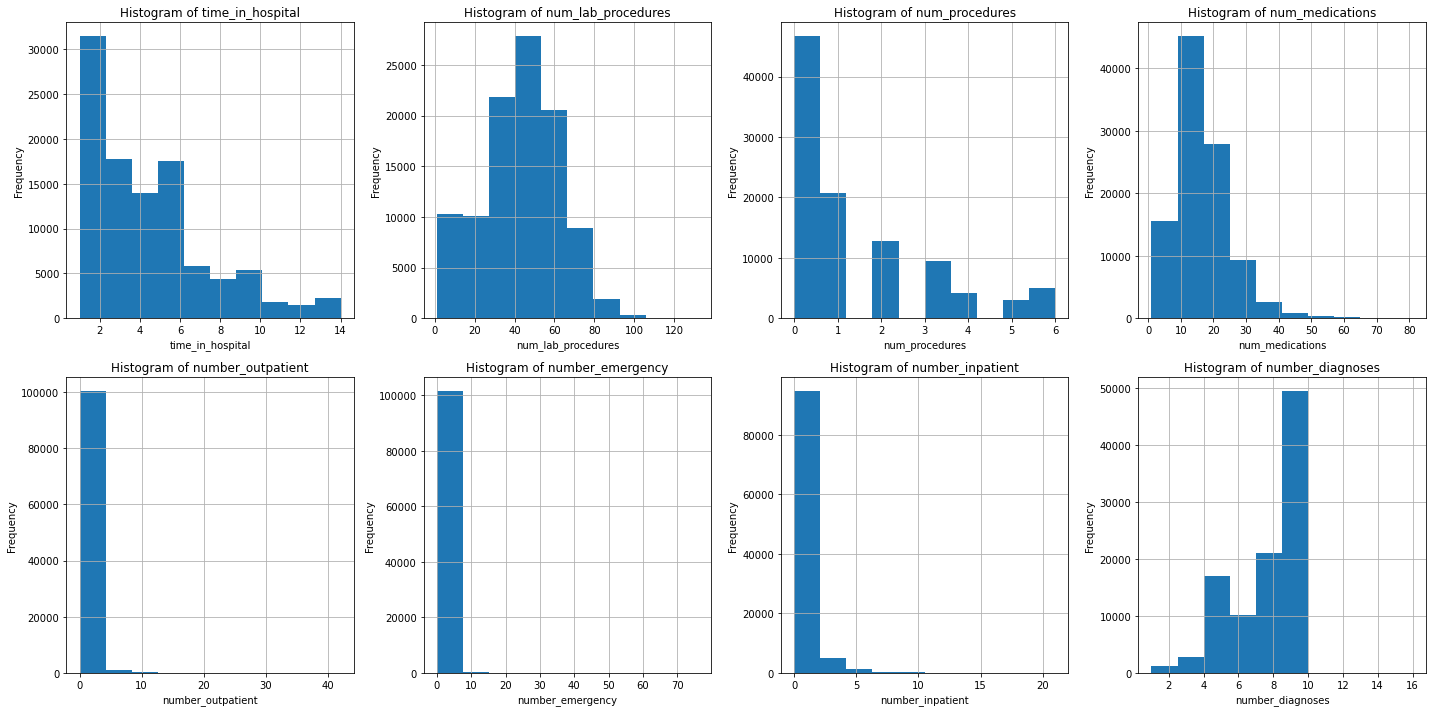

In [39]:
import matplotlib.pyplot as plt

# Filter the columns: select numeric columns starting from the second column
numeric_columns = [col for col in df.columns[8:] if df[col].dtype in ['int64', 'float64']]
num_cols = len(numeric_columns)

# Define the grid size for the subplots
n_rows = int(num_cols ** 0.5)
n_cols = int(num_cols / n_rows) + (num_cols % n_rows > 0)

# Create a larger figure to hold all subplots
plt.figure(figsize=(5 * n_cols, 5 * n_rows))

# Loop through numeric columns and create a subplot for each histogram
for index, column in enumerate(numeric_columns, 1):  # Start enumerate at 1 for subplot indexing
    plt.subplot(n_rows, n_cols, index)
    df[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

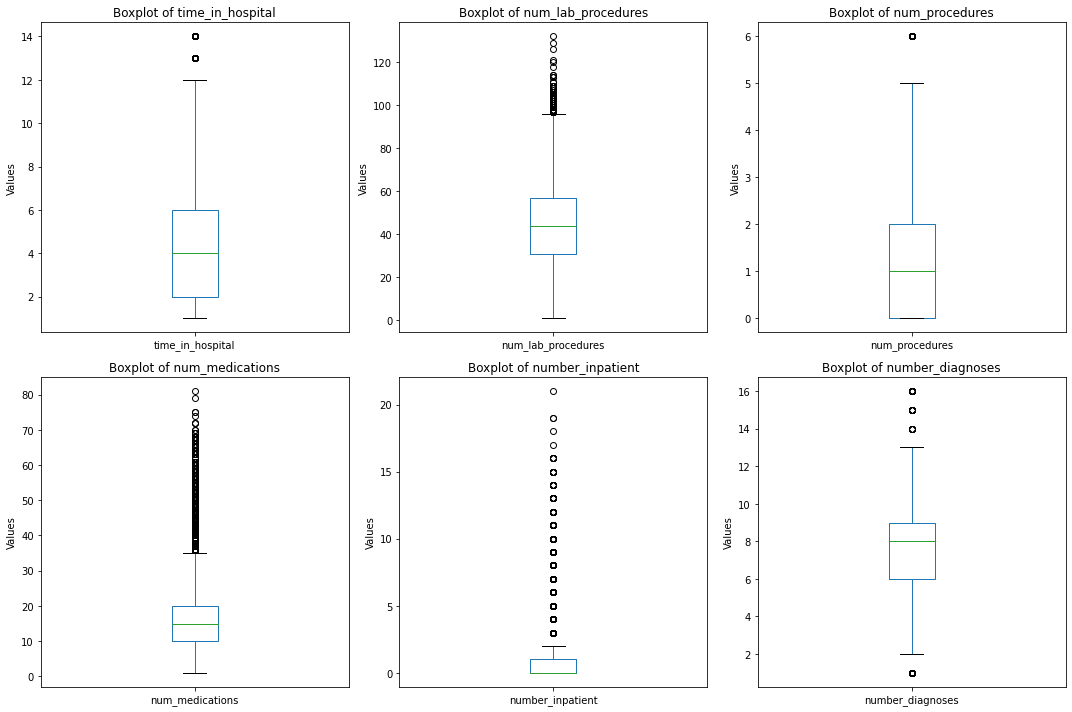

In [40]:
#Boxplots to visualize outliers or numerical features.

selected_columns = combined_df.columns[:7]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 2x3 subplot grid
axes = axes.flatten()  # Flatten the array of axes

# Plotting boxplots in a loop
for i, col in enumerate(combined_df.columns[0:6]):
    numeric_df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('Values')
    axes[i].grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

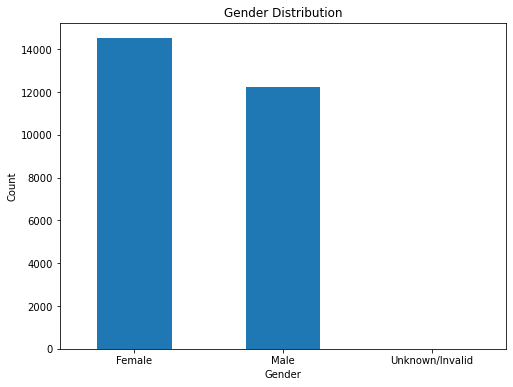

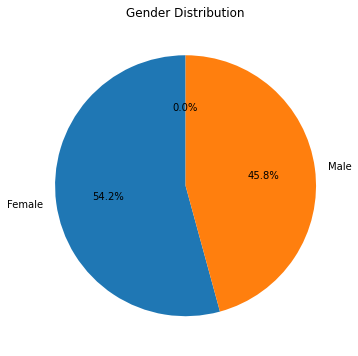

In [41]:
gender_counts = combined_df[~combined_df['gender'].isin(['Unknown', 'Invalid'])]['gender'].value_counts()

#gender_counts = combined_df['gender'].value_counts()

# Plotting the gender distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical for better readability
plt.show()


# Assuming gender_counts has been previously calculated
gender_counts = combined_df['gender'].value_counts()

# Plotting the gender distribution as a pie chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')  # Hiding the 'gender' label on the y-axis
plt.show()

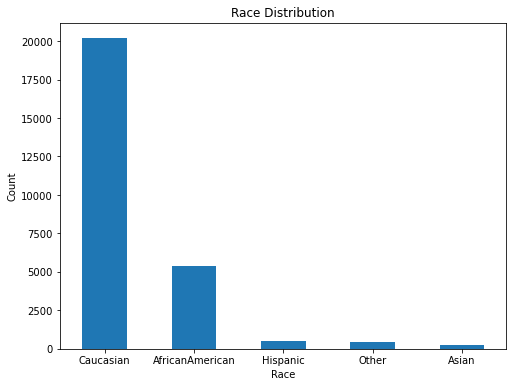

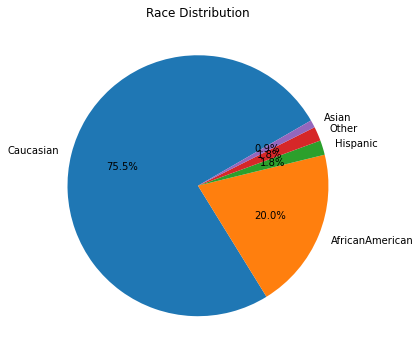

In [47]:
race_counts = combined_df[~combined_df['race'].isin(['Unknown', 'Invalid'])]['race'].value_counts()
# Plotting the gender distribution
plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical for better readability
plt.show()



race_counts = combined_df['race'].value_counts()

# Plotting the race distribution as a pie chart
plt.figure(figsize=(8, 6))
race_counts.plot(kind='pie', autopct='%1.1f%%', startangle=30)
plt.title('Race Distribution')
plt.ylabel('')  
plt.show()

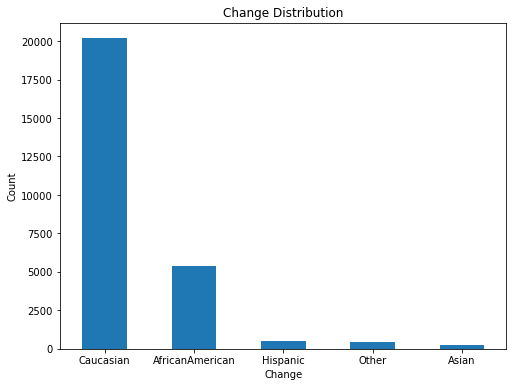

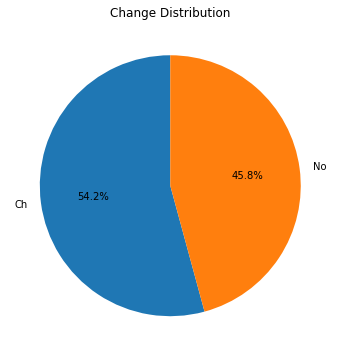

In [51]:
change_counts = combined_df[~combined_df['change'].isin(['Unknown', 'Invalid'])]['change'].value_counts()
# Plotting the gender distribution
plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar')
plt.title('Change Distribution')
plt.xlabel('Change')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical for better readability
plt.show()



changee_counts = combined_df['change'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
change_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Change Distribution')
plt.ylabel('') 
plt.show()

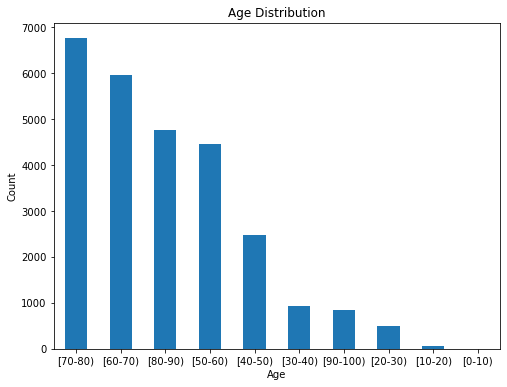

In [64]:
age_counts = combined_df[~combined_df['age'].isin(['Unknown', 'Invalid'])]['age'].value_counts()
# Plotting the gender distribution
plt.figure(figsize=(8, 6))
age_counts.plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical for better readability
plt.show()



In [65]:
print(combined_df.dtypes)

time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_inpatient               int64
number_diagnoses               int64
encounter_id                category
patient_nbr                 category
race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
diag_1                      category
diag_2                      category
diag_3                      category
metformin                   category
repaglinide                 category
glipizide                   category
insulin                     category
change                      category
diabetesMed                 category
readmitted                  category
dtype: object


In [66]:
combined_df.shape

(26755, 26)

In [68]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score

import pandas as pd


# Identify categorical columns which need encoding
categorical_features = combined_df.select_dtypes(include=['category']).columns.tolist()

# Create a preprocessing pipeline that only one-hot encodes categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

# Create the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Create a pipeline that first preprocesses the data, then fits the logistic regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logreg)])

# Define the KFold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the target variable
y = combined_df['readmitted']  # Replace 'target' with the name of your target column
X = combined_df.drop(columns=['readmitted'])  # Drop the target column to isolate features

# Perform 10-fold cross-validation and evaluate the model
# Replace 'accuracy' with the scoring metric of your choice, such as 'roc_auc'
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

print("Accuracy scores for each fold:")
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Accuracy scores for each fold:
[nan nan nan nan nan nan nan nan nan nan]
Average cross-validation score: nan


/Users/anupamakadambi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anupamakadambi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_cl